In [29]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Loading dataset
iris = load_iris()
X = iris.data
y = iris.target

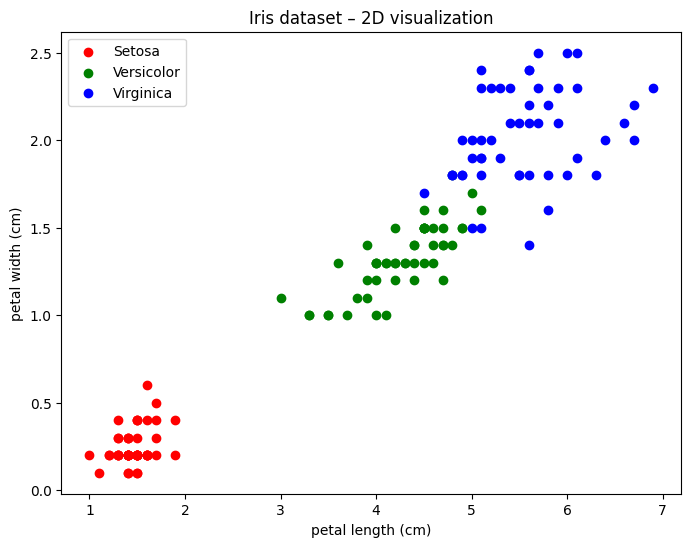

In [ ]:
# Visualize dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 2], X[y == 0, 3], color='red', label='Setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], color='green', label='Versicolor')
plt.scatter(X[y == 2, 2], X[y == 2, 3], color='blue', label='Virginica')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.title('Iris dataset – 2D visualization')
plt.show()

In [ ]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Create and train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [32]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Přesnost modelu: {accuracy:.2f}")

Přesnost modelu: 1.00


In [33]:
y_train_onehot = np.eye(3)[y_train]
y_test_onehot = np.eye(3)[y_test]

In [39]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [77]:
np.random.seed(42)
W = np.random.randn(X_train.shape[1], 3) * 0.01  # 4 features × 3 třídy
b = np.zeros((1, 3))
lr = 0.1
epochs = 600

for epoch in range(epochs):
    # Forward pass
    z = np.dot(X_train, W) + b
    probs = softmax(z)

    print(np.sum(y_train_onehot * np.log(probs + 1e-8), axis=1))

    # Cross-entropy loss
    loss = -np.mean(np.sum(y_train_onehot * np.log(probs + 1e-8), axis=1))

    # Gradienty 
    dW = np.dot(X_train.T, (probs - y_train_onehot)) / len(X_train)
    db = np.mean(probs - y_train_onehot, axis=0, keepdims=True)

    # Update
    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss = {loss:.4f}")

[-1.03910981 -1.02246884 -1.14941561 -1.03550641 -1.04117509 -1.15728621
 -1.14889322 -1.03468562 -1.03478568 -1.02854861 -1.16125548 -1.14863182
 -1.1495084  -1.03040888 -1.03211571 -1.13840247 -1.15888553 -1.16625035
 -1.14828982 -1.17669609 -1.1431423  -1.17579051 -1.14375708 -1.03576561
 -1.17494604 -1.14134554 -1.03674616 -1.03619634 -1.02645748 -1.13369195
 -1.15706011 -1.03273161 -1.03973709 -1.03330502 -1.14138213 -1.03597209
 -1.14341703 -1.1823446  -1.03993809 -1.1454498  -1.15949279 -1.02723945
 -1.15876913 -1.16125548 -1.13922775 -1.14279689 -1.16954952 -1.13855047
 -1.02671433 -1.13579066 -1.16171906 -1.0381874  -1.04118168 -1.13866201
 -1.14933174 -1.03968361 -1.16376828 -1.03612554 -1.03147194 -1.14732887
 -1.13820772 -1.16957217 -1.14356642 -1.16357423 -1.17044979 -1.13982213
 -1.04365836 -1.04611942 -1.15479358 -1.1702393  -1.04014583 -1.03511607
 -1.04345015 -1.14353088 -1.17193576 -1.03701717 -1.16550346 -1.17629131
 -1.04071296 -1.14496253 -1.1467017  -1.15686508 -1

In [66]:
z_test = np.dot(X_test, W) + b
probs_test = softmax(z_test)
y_pred = np.argmax(probs_test, axis=1)

accuracy = np.mean(y_pred == y_test)
print(f"Přesnost vlastního modelu: {accuracy:.2f}")

Přesnost vlastního modelu: 1.00


In [83]:
X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
z_new = np.dot(X_new, W) + b
probs_new = softmax(b)

y_pred = np.argmax(probs_new, axis=1)

print(iris.target_names[y_pred])

['versicolor']
